# Cardiotoxicity Exploratory Data Analysis 🫀

## 1. Problem 🧐

Identify that the compound is **toxic** or **non-toxic**.

Data:
* CSV (IC50 values, MACCS keys, Klekota-Roth and PubChem substructure fingerprints)
* SDF (series of molfiles)

MACCS keys:
* List of 166 (keys) binary values (0 or 1) which characterize a molecule.
Details: https://github.com/rdkit/rdkit-orig/blob/master/rdkit/Chem/MACCSkeys.py

Klekota-Roth fingerprints:
* Set of 4860 chemical substructures (binary values).
Details: 

PubChem fingerprints:
* 881 binary bits (indicate the presence or absence of a certain group of chemical features in a compound).
Details: https://web.cse.ohio-state.edu/~zhang.10631/bak/drugreposition/list_fingerprints.pdf



### 1.1 Libraries 📖

In [1]:
import sys
sys.path.append('..')

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import MolToSmiles

pd.set_option('display.max_columns', None)

colors_palette = ['#ffa600','#ff6361','#bc5090','#58508d', '#65345a']

### 1.2 Functions

In [2]:
def annotate(ax, fontsize=12):
    for p in ax.patches:
        ax.annotate(format(p.get_height(), ','), 
               (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', 
               xytext = (0, 6), textcoords = 'offset points', fontsize=fontsize)

## 2. Fingerprints

### 2.1 Data Analyse and Preprocessing 📊

In [3]:
data_path_cardio = "../data/raw/cardiotoxicity_hERG_MACCSFP_ready_set.csv" 
df_cardio = pd.read_csv(data_path_cardio)
print("Examples: {0}, columns: {1}".format(df_cardio.shape[0],df_cardio.shape[1]))
df_cardio.head()

Examples: 11504, columns: 167


IC50  MACCSFP1  MACCSFP2  MACCSFP3  MACCSFP4  MACCSFP5  MACCSFP6  \
0   645.0         0         0         0         0         0         0   
1  6600.0         0         0         0         0         0         0   
2  1600.0         0         0         0         0         0         0   
3  6700.0         0         0         0         0         0         0   
4  6600.0         0         0         0         0         0         0   

   MACCSFP7  MACCSFP8  MACCSFP9  MACCSFP10  MACCSFP11  MACCSFP12  MACCSFP13  \
0         0         0         0          0          0          0          0   
1         0         0         0          0          0          0          0   
2         0         0         0          0          0          0          0   
3         0         0         0          0          0          0          0   
4         0         0         0          0          0          0          0   

   MACCSFP14  MACCSFP15  MACCSFP16  MACCSFP17  MACCSFP18  MACCSFP19  \
0          0          0          0          0          0          0   
1          0          0          0          0          0          1   
2          0          0          0          0          0          0   
3          0          0          0          0          0          0   
4          0          0          0          0          0          0   

   MACCSFP20  MACCSFP21  MACCSFP22  MACCSFP23  MACCSFP24  MACCSFP25  \
0          0          0          1          0          0          0   
1          0          0          1          0          0          0   
2          0          0          1          0          0          0   
3          0          0          1          0          0          0   
4          0          0          1          0          0          0   

   MACCSFP26  MACCSFP27  MACCSFP28  MACCSFP29  MACCSFP30  MACCSFP31  \
0          0          0          0          0          0          0   
1          0          0          0          0          0          0   
2          0          0          0          0          0          0   
3          0          0          0          0          0          0   
4          0          0          0          0          0          0   

   MACCSFP32  MACCSFP33  MACCSFP34  MACCSFP35  MACCSFP36  MACCSFP37  \
0          0          0          0          0          0          0   
1          0          0          0          0          0          0   
2          0          0          0          0          0          0   
3          0          0          0          0          0          0   
4          0          0          0          0          0          0   

   MACCSFP38  MACCSFP39  MACCSFP40  MACCSFP41  MACCSFP42  MACCSFP43  \
0          0          0          0          0          0          0   
1          1          0          0          0          0          0   
2          1          0          0          0          0          0   
3          1          0          0          0          0          0   
4          1          0          0          0          0          0   

   MACCSFP44  MACCSFP45  MACCSFP46  MACCSFP47  MACCSFP48  MACCSFP49  \
0          0          0          0          0          0          0   
1          0          0          0          0          0          0   
2          0          0          0          0          0          0   
3          0          0          0          0          0          0   
4          0          0          0          0          0          0   

   MACCSFP50  MACCSFP51  MACCSFP52  MACCSFP53  MACCSFP54  MACCSFP55  \
0          0          0          0          0          0          0   
1          0          0          0          0          0          0   
2          0          0          0          0          0          0   
3          0          0          0          0          0          0   
4          0          0          0          0          0          0   

   MACCSFP56  MACCSFP57  MACCSFP58  MACCSFP59  MACCSFP60  MACCSFP61  \
0          0          0        

In [4]:
df_cardio_pubch = pd.read_csv("../data/raw/cardio_pubchem.csv")
print("Examples: {0}, columns: {1}".format(df_cardio_pubch.shape[0],df_cardio_pubch.shape[1]))
df_cardio_pubch.head()

Examples: 11504, columns: 882


Name  PubchemFP0  PubchemFP1  \
0  AUTOGEN_hERG_all_human_data_filtered_11504cmds_1           1           1   
1  AUTOGEN_hERG_all_human_data_filtered_11504cmds_2           1           1   
2  AUTOGEN_hERG_all_human_data_filtered_11504cmds_3           1           1   
3  AUTOGEN_hERG_all_human_data_filtered_11504cmds_4           1           1   
4  AUTOGEN_hERG_all_human_data_filtered_11504cmds_5           1           1   

   PubchemFP2  PubchemFP3  PubchemFP4  PubchemFP5  PubchemFP6  PubchemFP7  \
0           0           0           0           0           0           0   
1           1           0           0           0           0           0   
2           1           0           0           0           0           0   
3           1           0           0           0           0           0   
4           1           0           0           0           0           0   

   PubchemFP8  PubchemFP9  PubchemFP10  PubchemFP11  PubchemFP12  PubchemFP13  \
0           0           1            1            1            0            0   
1           0           1            1            1            1            0   
2           0           1            1            1            1            0   
3           0           1            1            1            1            0   
4           0           1            1            1            1            0   

   PubchemFP14  PubchemFP15  PubchemFP16  PubchemFP17  PubchemFP18  \
0            1            0            0            0            1   
1            1            1            0            0            1   
2            1            1            0            0            1   
3            1            1            0            0            1   
4            1            1            0            0            1   

   PubchemFP19  PubchemFP20  PubchemFP21  PubchemFP22  PubchemFP23  \
0            0            0            0            0            0   
1            1            0            0            0            0   
2            1            0            0            0            0   
3            1            0            0            0            0   
4            1            0            0            0            0   

   PubchemFP24  PubchemFP25  PubchemFP26  PubchemFP27  PubchemFP28  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   PubchemFP29  PubchemFP30  PubchemFP31  PubchemFP32  PubchemFP33  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   PubchemFP34  PubchemFP35  PubchemFP36  PubchemFP37  PubchemFP38  \
0            0            0            0            1            1   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   PubchemFP39  PubchemFP40  PubchemFP41  PubchemFP42  PubchemFP43  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   PubchemFP44  PubchemFP45  PubchemFP46  PubchemFP47  PubchemFP48  \
0            0            

In [5]:
df_cardio_klek = pd.read_csv("../data/raw/cardiotoxicity_hERG_KlekFP_ready_set.csv")
print("Examples: {0}, columns: {1}".format(df_cardio_klek.shape[0],df_cardio_klek.shape[1]))
df_cardio_klek.head()

/home/ewelina/miniconda3/envs/admet/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Examples: 11504, columns: 4861


IC50  KRFP1  KRFP2  KRFP3  KRFP4  KRFP5  KRFP6  KRFP7  KRFP8  KRFP9  \
0   645.0      0      0      0      0      0      0      0      0      0   
1  6600.0      0      0      0      0      0      0      0      0      0   
2  1600.0      0      0      0      0      0      0      0      0      0   
3  6700.0      0      0      0      0      0      0      0      0      0   
4  6600.0      0      0      0      0      0      0      0      0      0   

   KRFP10  KRFP11  KRFP12  KRFP13  KRFP14  KRFP15  KRFP16  KRFP17  KRFP18  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   KRFP19  KRFP20  KRFP21  KRFP22  KRFP23  KRFP24  KRFP25  KRFP26  KRFP27  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   KRFP28  KRFP29  KRFP30  KRFP31  KRFP32  KRFP33  KRFP34  KRFP35  KRFP36  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   KRFP37  KRFP38  KRFP39  KRFP40  KRFP41  KRFP42  KRFP43  KRFP44  KRFP45  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   KRFP46  KRFP47  KRFP48  KRFP49  KRFP50  KRFP51  KRFP52  KRFP53  KRFP54  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   KRFP55  KRFP56  KRFP57  KRFP58  KRFP59  KRFP60  KRFP61  KRFP62  KRFP63  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   KRFP64  KRFP65  KRFP66  KRFP67  KRFP68  KRFP69  KRFP70  KRFP71  KRFP72  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   KRFP73  KRFP74  KRFP75  KRFP76  KRFP77  KRFP78  KRFP79  KRFP80  KRFP81  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   

### 2.1.1 Missing/Invalid values 🔎

In [6]:
# count missing values
print("Missing values: {0}".format(df_cardio.isnull().sum().sum()))
print("Missing values: {0}".format(df_cardio_pubch.isnull().sum().sum()))
print("Missing values: {0}".format(df_cardio_klek.isnull().sum().sum()))

Missing values: 0
Missing values: 0
Missing values: 0


In [7]:
# Convert non-numeric entries to NaN (everything that cannot be converted to a numeric value)
df_cardio2 = (df_cardio.drop(df_cardio.columns, axis=1)
         .join(df_cardio[df_cardio.columns].apply(pd.to_numeric, errors='coerce')))

In [8]:
print("Invalid values: {0}".format(df_cardio2.isnull().sum().sum()))
index_list = df_cardio2[df_cardio2['IC50'].isnull()].index.tolist()
print("Invalid values examples:")
print(df_cardio['IC50'].iloc[index_list])
to_drop = index_list

Invalid values: 869
Invalid values examples:
15                   '='
16                   '='
29                   '='
30       27}]TRIACONTA-8
43                   '='
              ...       
11421                '='
11454                '='
11480                '='
11482                '>'
11483                '>'
Name: IC50, Length: 869, dtype: object


In [9]:
# and then keep only rows where all values are not null
df_cardio2 = df_cardio2[df_cardio2[df_cardio.columns].notnull().all(axis=1)]
df_cardio2

IC50  MACCSFP1  MACCSFP2  MACCSFP3  MACCSFP4  MACCSFP5  MACCSFP6  \
0         645.0         0         0         0         0         0         0   
1        6600.0         0         0         0         0         0         0   
2        1600.0         0         0         0         0         0         0   
3        6700.0         0         0         0         0         0         0   
4        6600.0         0         0         0         0         0         0   
...         ...       ...       ...       ...       ...       ...       ...   
11499    6600.0         0         0         0         0         0         0   
11500  100000.0         0         0         0         0         0         0   
11501   30000.0         0         0         0         0         0         0   
11502   26000.0         0         0         0         0         0         0   
11503       1.7         0         0         0         0         0         0   

       MACCSFP7  MACCSFP8  MACCSFP9  MACCSFP10  MACCSFP11  MACCSFP12  \
0             0         0         0          0          0          0   
1             0         0         0          0          0          0   
2             0         0         0          0          0          0   
3             0         0         0          0          0          0   
4             0         0         0          0          0          0   
...         ...       ...       ...        ...        ...        ...   
11499         0         0         0          0          0          0   
11500         0         0         0          0          0          0   
11501         0         0         0          0          0          0   
11502         0         0         0          0          0          0   
11503         0         0         0          0          0          0   

       MACCSFP13  MACCSFP14  MACCSFP15  MACCSFP16  MACCSFP17  MACCSFP18  \
0              0          0          0          0          0          0   
1              0          0          0          0          0          0   
2              0          0          0          0          0          0   
3              0          0          0          0          0          0   
4              0          0          0          0          0          0   
...          ...        ...        ...        ...        ...        ...   
11499          0          0          0          0          0          0   
11500          0          0          0          1          0          0   
11501          0          0          0          0          0          0   
11502          0          0          0          0          0          0   
11503          0          0          0          0          1          0   

       MACCSFP19  MACCSFP20  MACCSFP21  MACCSFP22  MACCSFP23  MACCSFP24  \
0              0          0          0          1          0          0   
1              1          0          0          1          0          0   
2              0          0          0          1          0          0   
3              0          0          0          1          0          0   
4              0          0          0          1          0          0   
...          ...        ...        ...        ...        ...        ...   
11499          0          0          0          1          0          0   
11500          0          0          0          1          0          0   
11501          0          0          0          1          0          0   
11502          0          0          0          1          0          0   
11503          0          0          0          1          0          0   

       MACCSFP25  MACCSFP26  MACCSFP27  MACCSFP28  MACCSFP29  MACCSFP30  \
0              0          0          0          0          0          0   
1              0          0          0          0          0          0   
2              0          0          0          0          0          0   
3              0          0          0          0          0          0   
4              0    

In [10]:
# find the IC50 zero values and drop them
zeros_list = df_cardio2[df_cardio2['IC50']==0.0].index.tolist()
print(zeros_list)
df_cardio2 = df_cardio2[df_cardio2['IC50']!=0.0]
to_drop.extend(zeros_list)
df_cardio2

[4347]


IC50  MACCSFP1  MACCSFP2  MACCSFP3  MACCSFP4  MACCSFP5  MACCSFP6  \
0         645.0         0         0         0         0         0         0   
1        6600.0         0         0         0         0         0         0   
2        1600.0         0         0         0         0         0         0   
3        6700.0         0         0         0         0         0         0   
4        6600.0         0         0         0         0         0         0   
...         ...       ...       ...       ...       ...       ...       ...   
11499    6600.0         0         0         0         0         0         0   
11500  100000.0         0         0         0         0         0         0   
11501   30000.0         0         0         0         0         0         0   
11502   26000.0         0         0         0         0         0         0   
11503       1.7         0         0         0         0         0         0   

       MACCSFP7  MACCSFP8  MACCSFP9  MACCSFP10  MACCSFP11  MACCSFP12  \
0             0         0         0          0          0          0   
1             0         0         0          0          0          0   
2             0         0         0          0          0          0   
3             0         0         0          0          0          0   
4             0         0         0          0          0          0   
...         ...       ...       ...        ...        ...        ...   
11499         0         0         0          0          0          0   
11500         0         0         0          0          0          0   
11501         0         0         0          0          0          0   
11502         0         0         0          0          0          0   
11503         0         0         0          0          0          0   

       MACCSFP13  MACCSFP14  MACCSFP15  MACCSFP16  MACCSFP17  MACCSFP18  \
0              0          0          0          0          0          0   
1              0          0          0          0          0          0   
2              0          0          0          0          0          0   
3              0          0          0          0          0          0   
4              0          0          0          0          0          0   
...          ...        ...        ...        ...        ...        ...   
11499          0          0          0          0          0          0   
11500          0          0          0          1          0          0   
11501          0          0          0          0          0          0   
11502          0          0          0          0          0          0   
11503          0          0          0          0          1          0   

       MACCSFP19  MACCSFP20  MACCSFP21  MACCSFP22  MACCSFP23  MACCSFP24  \
0              0          0          0          1          0          0   
1              1          0          0          1          0          0   
2              0          0          0          1          0          0   
3              0          0          0          1          0          0   
4              0          0          0          1          0          0   
...          ...        ...        ...        ...        ...        ...   
11499          0          0          0          1          0          0   
11500          0          0          0          1          0          0   
11501          0          0          0          1          0          0   
11502          0          0          0          1          0          0   
11503          0          0          0          1          0          0   

       MACCSFP25  MACCSFP26  MACCSFP27  MACCSFP28  MACCSFP29  MACCSFP30  \
0              0          0          0          0          0          0   
1              0          0          0          0          0          0   
2              0          0          0          0          0          0   
3              0          0          0          0          0          0   
4              0    

### 2.1.2 Class balance/Outliers

In [46]:
df_cardio2['IC50'].describe()

count    1.063400e+04
mean     3.182548e+05
std      1.400203e+07
min      1.400000e-01
25%      2.034250e+03
50%      1.000000e+04
75%      3.000000e+04
max      1.000000e+09
Name: IC50, dtype: float64

In [47]:
toxic = df_cardio2[df_cardio2['IC50']<=1000].count()[0]
non_toxic = df_cardio2[df_cardio2['IC50']>1000].count()[0]
all_tox = df_cardio2['IC50'].count()
print('For 1000: {0} Toxic compounds and {1} non toxic compounds'.format(toxic, non_toxic))
print('For 1000: {:.2%} Toxic compounds and {:.2%} non toxic compounds'.format(toxic/all_tox, non_toxic/all_tox))
toxic = df_cardio2[df_cardio2['IC50']<=10000].count()[0]
non_toxic = df_cardio2[df_cardio2['IC50']>10000].count()[0]
print('For 10000: {0} Toxic compounds and {1} non toxic compounds'.format(toxic, non_toxic))
print('For 10000: {:.2%} Toxic compounds and {:.2%} non toxic compounds'.format(toxic/all_tox, non_toxic/all_tox))

For 1000: 1841 Toxic compounds and 8793 non toxic compounds
For 1000: 17.31% Toxic compounds and 82.69% non toxic compounds
For 10000: 6208 Toxic compounds and 4426 non toxic compounds
For 10000: 58.38% Toxic compounds and 41.62% non toxic compounds


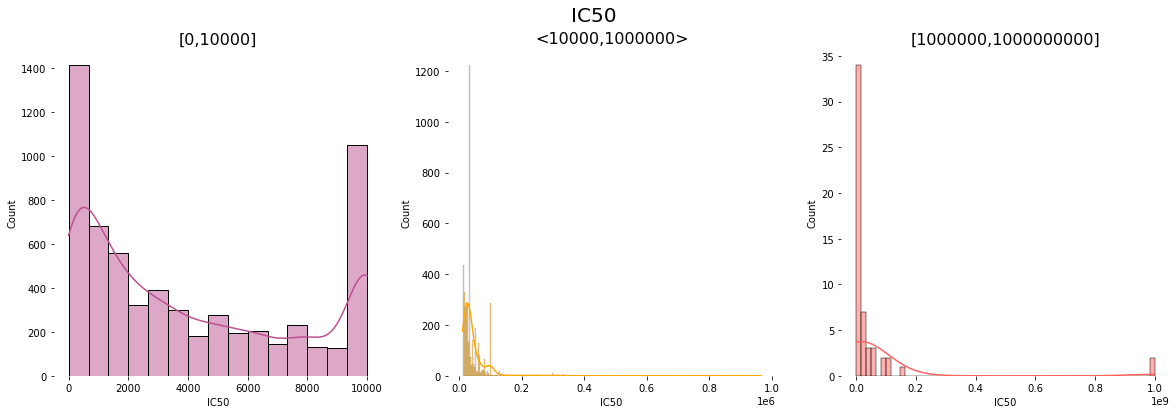

In [48]:
IC_50_1 = df_cardio2[df_cardio2['IC50']<=10000]
IC_50_2 = df_cardio2[df_cardio2['IC50'].between(10000, 1000000, inclusive=False)]
IC_50_3 = df_cardio2[df_cardio2['IC50'].between(1000000,1000000000, inclusive=True)]

fig, axes = plt.subplots(1, 3, figsize = (20, 6))
fig.suptitle('IC50', fontsize=20)
left = sns.histplot(data=IC_50_1, x='IC50', ax = axes[0], kde=True, color=colors_palette[2])
center = sns.histplot(data=IC_50_2, x='IC50', ax = axes[1], kde=True, color=colors_palette[0])
right = sns.histplot(data=IC_50_3, x='IC50', ax = axes[2], kde=True, color=colors_palette[1])
axes[0].set_title('[0,10000]', fontsize=16)
axes[1].set_title('<10000,1000000>', fontsize=16)
axes[2].set_title('[1000000,1000000000]', fontsize=16)

sns.despine(left=True, bottom=True)

In [49]:
df_scaled = StandardScaler().fit_transform(df_cardio2['IC50'][:,np.newaxis]);
low_range = df_scaled[df_scaled[:,0].argsort()][:10]
high_range= df_scaled[df_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-0.02273025]
 [-0.02273024]
 [-0.02273024]
 [-0.02273023]
 [-0.02273023]
 [-0.02273023]
 [-0.02273023]
 [-0.02273022]
 [-0.02273021]
 [-0.02273021]]

outer range (high) of the distribution:
[[ 4.4836665 ]
 [ 4.58863397]
 [ 4.69604644]
 [ 6.0562317 ]
 [ 6.95685193]
 [ 7.11942729]
 [ 7.11942729]
 [11.29682661]
 [71.39884517]
 [71.39884517]]


/home/ewelina/miniconda3/envs/admet/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  """Entry point for launching an IPython kernel.


In [11]:
# drop 2 outliers
to_drop.extend(df_cardio2[df_cardio2['IC50']>=1000000000].index)
df_cardio2 = df_cardio2[df_cardio2['IC50']<1000000000]
df_cardio2

IC50  MACCSFP1  MACCSFP2  MACCSFP3  MACCSFP4  MACCSFP5  MACCSFP6  \
0         645.0         0         0         0         0         0         0   
1        6600.0         0         0         0         0         0         0   
2        1600.0         0         0         0         0         0         0   
3        6700.0         0         0         0         0         0         0   
4        6600.0         0         0         0         0         0         0   
...         ...       ...       ...       ...       ...       ...       ...   
11499    6600.0         0         0         0         0         0         0   
11500  100000.0         0         0         0         0         0         0   
11501   30000.0         0         0         0         0         0         0   
11502   26000.0         0         0         0         0         0         0   
11503       1.7         0         0         0         0         0         0   

       MACCSFP7  MACCSFP8  MACCSFP9  MACCSFP10  MACCSFP11  MACCSFP12  \
0             0         0         0          0          0          0   
1             0         0         0          0          0          0   
2             0         0         0          0          0          0   
3             0         0         0          0          0          0   
4             0         0         0          0          0          0   
...         ...       ...       ...        ...        ...        ...   
11499         0         0         0          0          0          0   
11500         0         0         0          0          0          0   
11501         0         0         0          0          0          0   
11502         0         0         0          0          0          0   
11503         0         0         0          0          0          0   

       MACCSFP13  MACCSFP14  MACCSFP15  MACCSFP16  MACCSFP17  MACCSFP18  \
0              0          0          0          0          0          0   
1              0          0          0          0          0          0   
2              0          0          0          0          0          0   
3              0          0          0          0          0          0   
4              0          0          0          0          0          0   
...          ...        ...        ...        ...        ...        ...   
11499          0          0          0          0          0          0   
11500          0          0          0          1          0          0   
11501          0          0          0          0          0          0   
11502          0          0          0          0          0          0   
11503          0          0          0          0          1          0   

       MACCSFP19  MACCSFP20  MACCSFP21  MACCSFP22  MACCSFP23  MACCSFP24  \
0              0          0          0          1          0          0   
1              1          0          0          1          0          0   
2              0          0          0          1          0          0   
3              0          0          0          1          0          0   
4              0          0          0          1          0          0   
...          ...        ...        ...        ...        ...        ...   
11499          0          0          0          1          0          0   
11500          0          0          0          1          0          0   
11501          0          0          0          1          0          0   
11502          0          0          0          1          0          0   
11503          0          0          0          1          0          0   

       MACCSFP25  MACCSFP26  MACCSFP27  MACCSFP28  MACCSFP29  MACCSFP30  \
0              0          0          0          0          0          0   
1              0          0          0          0          0          0   
2              0          0          0          0          0          0   
3              0          0          0          0          0          0   
4              0    

In [51]:
df_cardio2['IC50'].describe()

count    1.063200e+04
mean     1.302033e+05
std      2.837080e+06
min      1.400000e-01
25%      2.030000e+03
50%      1.000000e+04
75%      3.000000e+04
max      1.584893e+08
Name: IC50, dtype: float64

### 2.1.3 Convert IC50 to pIC50

1. Convert nM to M.
2. Apply -log10.

IC50 -> higher values are better: <=10000 nM -> active (toxic)

pIC50 -> lower values are better (higher values -> stronger inhibitors): >=5.0 -> active (toxic).

In [12]:
df_cardio2 = df_cardio2.assign(IC50 = -np.log10(df_cardio2.IC50*(10**-9)))
df_cardio2.rename(columns={"IC50": "pIC50"}, inplace = True)
df_cardio2

pIC50  MACCSFP1  MACCSFP2  MACCSFP3  MACCSFP4  MACCSFP5  MACCSFP6  \
0      6.190440         0         0         0         0         0         0   
1      5.180456         0         0         0         0         0         0   
2      5.795880         0         0         0         0         0         0   
3      5.173925         0         0         0         0         0         0   
4      5.180456         0         0         0         0         0         0   
...         ...       ...       ...       ...       ...       ...       ...   
11499  5.180456         0         0         0         0         0         0   
11500  4.000000         0         0         0         0         0         0   
11501  4.522879         0         0         0         0         0         0   
11502  4.585027         0         0         0         0         0         0   
11503  8.769551         0         0         0         0         0         0   

       MACCSFP7  MACCSFP8  MACCSFP9  MACCSFP10  MACCSFP11  MACCSFP12  \
0             0         0         0          0          0          0   
1             0         0         0          0          0          0   
2             0         0         0          0          0          0   
3             0         0         0          0          0          0   
4             0         0         0          0          0          0   
...         ...       ...       ...        ...        ...        ...   
11499         0         0         0          0          0          0   
11500         0         0         0          0          0          0   
11501         0         0         0          0          0          0   
11502         0         0         0          0          0          0   
11503         0         0         0          0          0          0   

       MACCSFP13  MACCSFP14  MACCSFP15  MACCSFP16  MACCSFP17  MACCSFP18  \
0              0          0          0          0          0          0   
1              0          0          0          0          0          0   
2              0          0          0          0          0          0   
3              0          0          0          0          0          0   
4              0          0          0          0          0          0   
...          ...        ...        ...        ...        ...        ...   
11499          0          0          0          0          0          0   
11500          0          0          0          1          0          0   
11501          0          0          0          0          0          0   
11502          0          0          0          0          0          0   
11503          0          0          0          0          1          0   

       MACCSFP19  MACCSFP20  MACCSFP21  MACCSFP22  MACCSFP23  MACCSFP24  \
0              0          0          0          1          0          0   
1              1          0          0          1          0          0   
2              0          0          0          1          0          0   
3              0          0          0          1          0          0   
4              0          0          0          1          0          0   
...          ...        ...        ...        ...        ...        ...   
11499          0          0          0          1          0          0   
11500          0          0          0          1          0          0   
11501          0          0          0          1          0          0   
11502          0          0          0          1          0          0   
11503          0          0          0          1          0          0   

       MACCSFP25  MACCSFP26  MACCSFP27  MACCSFP28  MACCSFP29  MACCSFP30  \
0              0          0          0          0          0          0   
1              0          0          0          0          0          0   
2              0          0          0          0          0          0   
3              0          0          0          0          0          0   
4              0   

In [53]:
df_cardio2['pIC50'].describe()

count    10632.000000
mean         5.234620
std          0.951665
min          0.800000
25%          4.522879
50%          5.000000
75%          5.692504
max          9.853872
Name: pIC50, dtype: float64

### 2.1.4 Classes statistics 📈

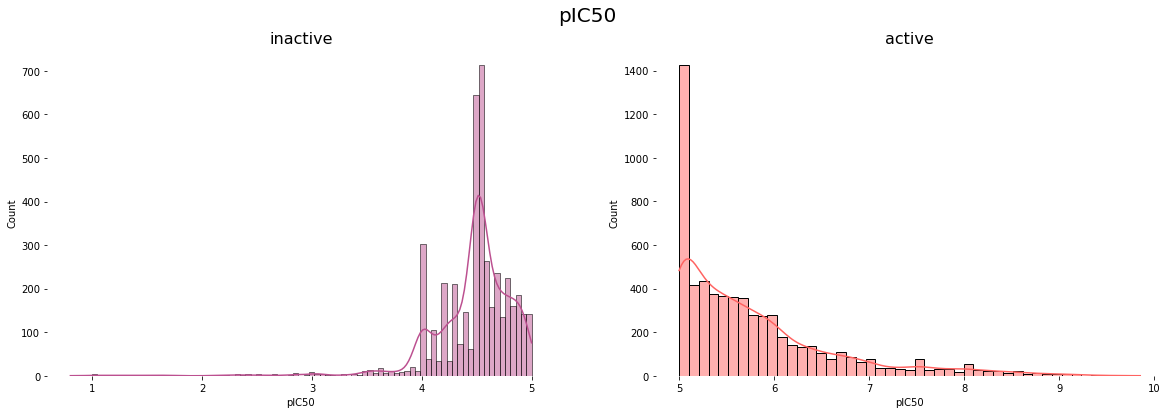

In [32]:
IC_50_1 = df_cardio2[df_cardio2['pIC50']<5]
IC_50_2 = df_cardio2[df_cardio2['pIC50']>=5]

fig, axes = plt.subplots(1, 2, figsize = (20, 6))
fig.suptitle('pIC50', fontsize=20)
left = sns.histplot(data=IC_50_1, x='pIC50', ax = axes[0], kde=True, color=colors_palette[2])
right = sns.histplot(data=IC_50_2, x='pIC50', ax = axes[1], kde=True, color=colors_palette[1])
axes[0].set_title('inactive', fontsize=16)
axes[1].set_title('active', fontsize=16)

sns.despine(left=True, bottom=True)

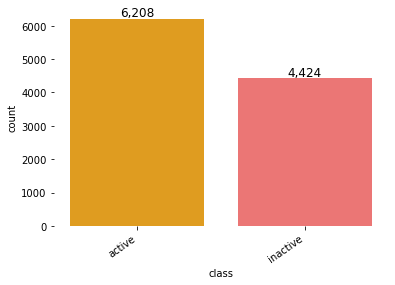

In [33]:
activity_th = []
for i in df_cardio2.pIC50:
    if float(i) < 5:
        activity_th.append("inactive")
    elif float(i) >= 5:
        activity_th.append("active")
    
activity_class = pd.Series(activity_th, name='class')
class_df = pd.concat([df_cardio2, activity_class], axis=1)

a = sns.countplot(x='class', data=class_df, palette=colors_palette)

annotate(a)

a.set_xticklabels(a.get_xticklabels(), rotation=35, ha="right")
sns.despine(left=True, bottom=True);

Text(0, 0.5, 'pIC50 value')

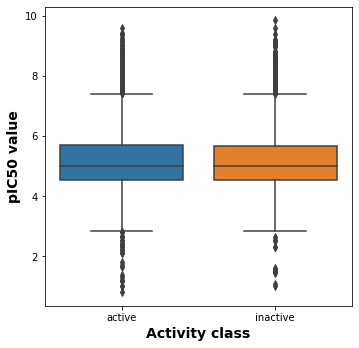

In [34]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'pIC50', data = class_df)

plt.xlabel('Activity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

### 2.1.5 Prepare other fingerprints

In [13]:
to_drop.sort(reverse=True)

In [58]:
df_cardio_pubch.drop('Name', axis=1, inplace=True)
df_cardio_pubch.apply(pd.to_numeric, errors='coerce')
df_cardio_pubch.drop(to_drop, axis=0, inplace=True)
df_cardio_pubch = df_cardio_pubch.join(df_cardio2['pIC50'])
df_cardio_pubch

PubchemFP0  PubchemFP1  PubchemFP2  PubchemFP3  PubchemFP4  PubchemFP5  \
0               1           1           0           0           0           0   
1               1           1           1           0           0           0   
2               1           1           1           0           0           0   
3               1           1           1           0           0           0   
4               1           1           1           0           0           0   
...           ...         ...         ...         ...         ...         ...   
11499           1           1           1           0           0           0   
11500           1           1           1           0           0           0   
11501           1           1           1           0           0           0   
11502           1           1           1           0           0           0   
11503           1           1           1           0           0           0   

       PubchemFP6  PubchemFP7  PubchemFP8  PubchemFP9  PubchemFP10  \
0               0           0           0           1            1   
1               0           0           0           1            1   
2               0           0           0           1            1   
3               0           0           0           1            1   
4               0           0           0           1            1   
...           ...         ...         ...         ...          ...   
11499           0           0           0           1            1   
11500           0           0           0           1            1   
11501           0           0           0           1            1   
11502           0           0           0           1            1   
11503           0           0           0           1            1   

       PubchemFP11  PubchemFP12  PubchemFP13  PubchemFP14  PubchemFP15  \
0                1            0            0            1            0   
1                1            1            0            1            1   
2                1            1            0            1            1   
3                1            1            0            1            1   
4                1            1            0            1            1   
...            ...          ...          ...          ...          ...   
11499            1            1            0            1            1   
11500            1            1            0            1            1   
11501            1            1            0            1            1   
11502            1            1            0            1            1   
11503            1            1            0            1            1   

       PubchemFP16  PubchemFP17  PubchemFP18  PubchemFP19  PubchemFP20  \
0                0            0            1            0            0   
1                0            0            1            1            0   
2                0            0            1            1            0   
3                0            0            1            1            0   
4                0            0            1            1            0   
...            ...          ...          ...          ...          ...   
11499            0            0            1            1            0   
11500            1            0            1            1            0   
11501            0            0            1            0            0   
11502            1            0            1            1            0   
11503            1            0            1            1            1   

       PubchemFP21  PubchemFP22  PubchemFP23  PubchemFP24  PubchemFP25  \
0                0            0            0            0            0   
1                0            0            0            0            0   
2                0            0            0            0            0   
3                0            0            0            0            0   
4                0            0            0 

In [59]:
df_cardio_klek.drop('IC50', axis=1, inplace=True)
df_cardio_klek.apply(pd.to_numeric, errors='coerce')
df_cardio_klek.drop(to_drop, axis=0, inplace=True)
df_cardio_klek = df_cardio_klek.join(df_cardio2['pIC50'])
df_cardio_klek

KRFP1  KRFP2  KRFP3  KRFP4  KRFP5  KRFP6  KRFP7  KRFP8  KRFP9  KRFP10  \
0          0      0      0      0      0      0      0      0      0       0   
1          0      0      0      0      0      0      0      0      0       0   
2          0      0      0      0      0      0      0      0      0       0   
3          0      0      0      0      0      0      0      0      0       0   
4          0      0      0      0      0      0      0      0      0       0   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...     ...   
11499      1      1      0      0      0      0      0      0      0       0   
11500      1      1      0      0      0      0      0      0      0       0   
11501      1      1      0      0      0      0      0      0      0       0   
11502      1      0      0      0      0      0      0      0      0       0   
11503      1      0      0      0      0      0      0      0      0       0   

       KRFP11  KRFP12  KRFP13  KRFP14  KRFP15  KRFP16  KRFP17  KRFP18  KRFP19  \
0           0       0       0       0       0       0       0       0       0   
1           0       0       0       0       0       0       0       0       0   
2           0       0       0       0       0       0       0       0       0   
3           0       0       0       0       0       0       0       0       0   
4           0       0       0       0       0       0       0       0       0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
11499       0       0       0       1       0       0       0       1       0   
11500       0       0       0       0       0       0       0       0       0   
11501       0       0       0       0       0       0       1       0       0   
11502       0       0       0       0       0       1       0       1       0   
11503       0       0       0       0       0       0       0       0       0   

       KRFP20  KRFP21  KRFP22  KRFP23  KRFP24  KRFP25  KRFP26  KRFP27  KRFP28  \
0           0       0       0       0       0       0       0       0       0   
1           0       0       0       0       0       0       0       0       0   
2           0       0       0       0       0       0       0       0       0   
3           0       0       0       0       0       0       0       0       0   
4           0       0       0       0       0       0       0       0       0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
11499       1       0       0       0       0       0       0       0       0   
11500       0       0       0       0       0       0       0       0       0   
11501       0       0       0       0       0       0       0       0       0   
11502       0       0       0       0       0       0       0       0       0   
11503       0       0       0       0       0       0       0       0       0   

       KRFP29  KRFP30  KRFP31  KRFP32  KRFP33  KRFP34  KRFP35  KRFP36  KRFP37  \
0           0       0       0       0       0       0       0       0       0   
1           0       0       0       0       0       0       0       0       0   
2           0       0       0       0       0       0       0       0       0   
3           0       0       0       0       0       0       0       0       0   
4           0       0       0       0       0       0       0       0       0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
11499       0       0       0       0       0       0       0       0       0   
11500       0       0       0       0       0       0       0       0       0   
11501       0       0       0       0       0       0       0       0       0   
11502       0       0       0       0       0       0       0       0       0   
11503       0       0       0       0       0       0       0       0       0   

       KRFP38  KRFP39  KRFP40  KRFP41  KRFP42  KRFP43  KRFP44  KRFP45  KRFP46  \
0           0       0       0       0       0 

### 2.1.6 Save

In [60]:
df_cardio2.to_csv('../data/processed/cardio_maccs_all.csv', index=False)
df_cardio_pubch.to_csv('../data/processed/cardio_pubchem_all.csv', index=False)
df_cardio_klek.to_csv('../data/processed/cardio_klek_all.csv', index=False)

## 3. SDF file

Prepare SDF file with mols. 

### 3.1 Load data

In [14]:
suppl = Chem.SDMolSupplier('../data/raw/hERG_all_human_data_filtered_11504cmds.sdf')
ms = [x for x in suppl if x is not None]
len(ms)

11504

### 3.2 Preprocess

Convert mols to smiles.

In [15]:
cardio_smiles = [MolToSmiles(x,isomericSmiles=False) for x in ms ]
df_cardio_smiles = pd.DataFrame(cardio_smiles, columns=['smiles'])
df_cardio_smiles

smiles
0                           CNCc1ccc(Cl)cc1Oc1ccc(Cl)cc1
1            Cc1nc2ccccc2c(=O)n1-c1ccc(OCCCN2CCCCCC2)cc1
2         Cc1cccc2c(=O)n(-c3ccc(OCCCN4CCCC4)cc3)c(C)nc12
3         Cc1ccc2c(=O)n(-c3ccc(OCCCN4CCCC4)cc3)c(C)nc2c1
4         Cc1cccc2nc(C)n(-c3ccc(OCCCN4CCCC4)cc3)c(=O)c12
...                                                  ...
11499  CC1OC2(CCN(CCc3ccccc3F)CC2)CN(c2ncccc2C(F)(F)F...
11500    Cn1nccc1C1CCCC1Oc1cc(F)c(S(=O)(=O)Nc2nccs2)cc1F
11501       OC(c1cccnc1-c1cccc(Cl)c1)C(c1cccnc1)c1cccnc1
11502  CCOc1cc(C(=O)Nc2cc(C(F)(F)F)ccn2)ccc1-c1nc(C23...
11503  NC(=O)c1cc(Cl)c2c(Cl)c(C#CC3CCOCC3)n(C3CCCNC3)...

[11504 rows x 1 columns]

Drop.

In [16]:
len(to_drop)

872

In [17]:
df_cardio_smiles.drop(to_drop, axis=0, inplace=True)
df_cardio_smiles

smiles
0                           CNCc1ccc(Cl)cc1Oc1ccc(Cl)cc1
1            Cc1nc2ccccc2c(=O)n1-c1ccc(OCCCN2CCCCCC2)cc1
2         Cc1cccc2c(=O)n(-c3ccc(OCCCN4CCCC4)cc3)c(C)nc12
3         Cc1ccc2c(=O)n(-c3ccc(OCCCN4CCCC4)cc3)c(C)nc2c1
4         Cc1cccc2nc(C)n(-c3ccc(OCCCN4CCCC4)cc3)c(=O)c12
...                                                  ...
11499  CC1OC2(CCN(CCc3ccccc3F)CC2)CN(c2ncccc2C(F)(F)F...
11500    Cn1nccc1C1CCCC1Oc1cc(F)c(S(=O)(=O)Nc2nccs2)cc1F
11501       OC(c1cccnc1-c1cccc(Cl)c1)C(c1cccnc1)c1cccnc1
11502  CCOc1cc(C(=O)Nc2cc(C(F)(F)F)ccn2)ccc1-c1nc(C23...
11503  NC(=O)c1cc(Cl)c2c(Cl)c(C#CC3CCOCC3)n(C3CCCNC3)...

[10632 rows x 1 columns]

Join.

In [18]:
df_cardio_smiles = df_cardio_smiles.join(df_cardio2['pIC50'])
df_cardio_smiles

smiles     pIC50
0                           CNCc1ccc(Cl)cc1Oc1ccc(Cl)cc1  6.190440
1            Cc1nc2ccccc2c(=O)n1-c1ccc(OCCCN2CCCCCC2)cc1  5.180456
2         Cc1cccc2c(=O)n(-c3ccc(OCCCN4CCCC4)cc3)c(C)nc12  5.795880
3         Cc1ccc2c(=O)n(-c3ccc(OCCCN4CCCC4)cc3)c(C)nc2c1  5.173925
4         Cc1cccc2nc(C)n(-c3ccc(OCCCN4CCCC4)cc3)c(=O)c12  5.180456
...                                                  ...       ...
11499  CC1OC2(CCN(CCc3ccccc3F)CC2)CN(c2ncccc2C(F)(F)F...  5.180456
11500    Cn1nccc1C1CCCC1Oc1cc(F)c(S(=O)(=O)Nc2nccs2)cc1F  4.000000
11501       OC(c1cccnc1-c1cccc(Cl)c1)C(c1cccnc1)c1cccnc1  4.522879
11502  CCOc1cc(C(=O)Nc2cc(C(F)(F)F)ccn2)ccc1-c1nc(C23...  4.585027
11503  NC(=O)c1cc(Cl)c2c(Cl)c(C#CC3CCOCC3)n(C3CCCNC3)...  8.769551

[10632 rows x 2 columns]

In [19]:
df_cardio_smiles.isnull().values.any()

False

### 3.3 Save

In [20]:
df_cardio_smiles.to_csv('../data/processed/cardio_smiles_all.csv', index=False)